In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [4]:
iris = pd.read_csv('C:\Dataset\Iris.csv')
print(iris.head())
print(iris.shape)
print(iris.info())

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [5]:
iris.isna().values.any() #Identifikasi Missing Values


False

In [6]:
iris[iris.duplicated()]

,sepal.length,sepal.width,petal.length,petal.width,variety
142,5.8,2.7,5.1,1.9,Virginica


In [7]:
iris.duplicated().value_counts()

False    149
True       1
dtype: int64

In [8]:

iris.drop_duplicates(inplace=True)
iris.shape

(149, 5)

In [9]:
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
iris.corr()

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.118129,0.873738,0.820620
sepal.width,-0.118129,1.000000,-0.426028,-0.362894
petal.length,0.873738,-0.426028,1.000000,0.962772
petal.width,0.820620,-0.362894,0.962772,1.000000


# Visualisasi Data

<AxesSubplot:>

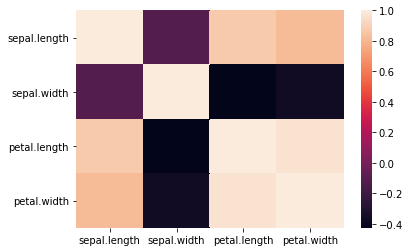

In [11]:
sns.heatmap(data=iris.corr())

In [12]:
iris['variety'].value_counts()

Versicolor    50
Setosa        50
Virginica     49
Name: variety, dtype: int64

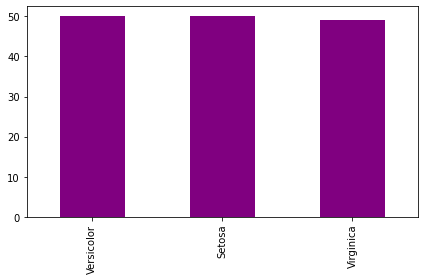

In [13]:
iris['variety'].value_counts().plot.bar(color='purple')
plt.tight_layout()
plt.show()

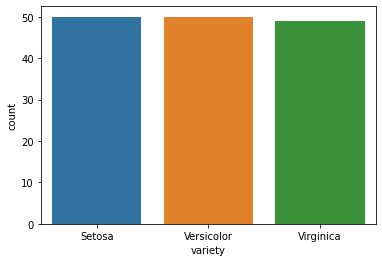

In [14]:
sns.countplot(data=iris, x='variety')
plt.show()

<AxesSubplot:>

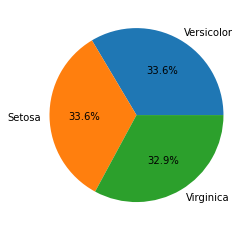

In [15]:
iris['variety'].value_counts().plot.pie(autopct='%1.1f%%', label='', legend=False)

# Line Plot

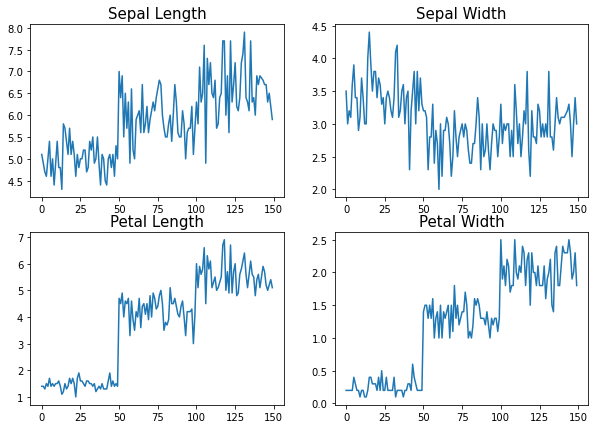

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(10,7))

a = ax[0][0]
iris['sepal.length'].plot.line(ax=a)
a.set_title('Sepal Length', fontsize=15)

b = ax[0][1]
iris['sepal.width'].plot.line(ax=b)
b.set_title('Sepal Width', fontsize=15)

c = ax[1][0]
iris['petal.length'].plot.line(ax=c)
c.set_title('Petal Length', fontsize=15)

d = ax[1][1]
iris['petal.width'].plot.line(ax=d)
d.set_title('Petal Width', fontsize=15)

plt.show()

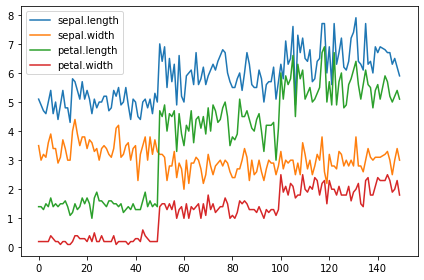

In [17]:
iris.plot()
plt.tight_layout()

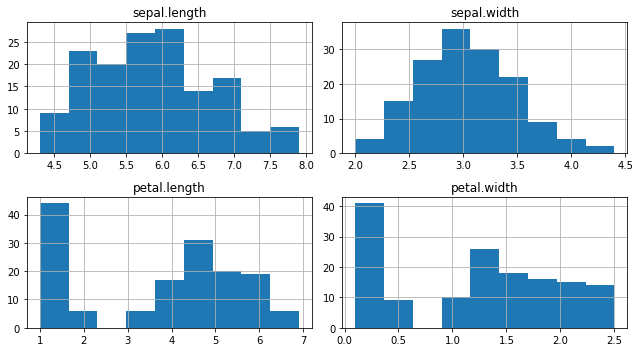

In [18]:
iris.hist(figsize=(9,5), bins=9)
plt.tight_layout()

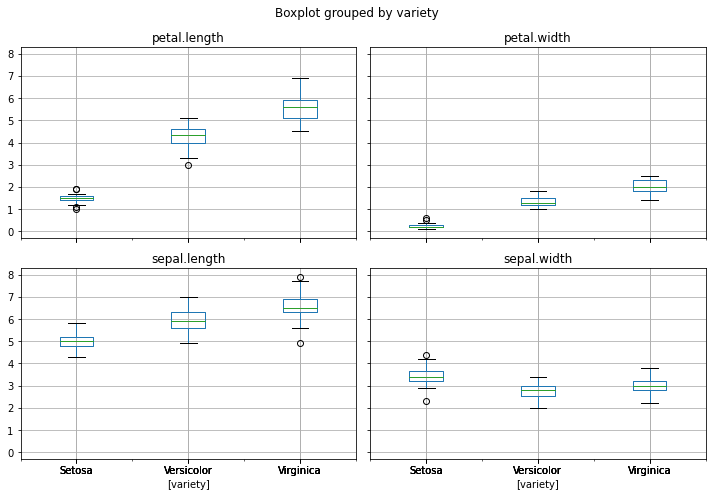

In [19]:
iris.boxplot(by='variety', figsize=(10,7))
plt.tight_layout()

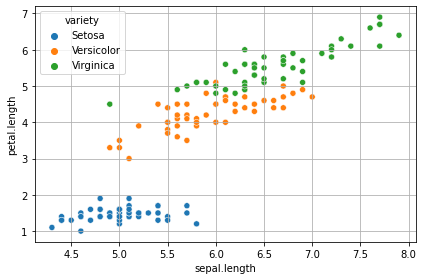

In [20]:
sns.scatterplot(x='sepal.length',y='petal.length',data=iris,hue='variety')
plt.grid()
plt.tight_layout()

<AxesSubplot:xlabel='sepal.length', ylabel='variety'>

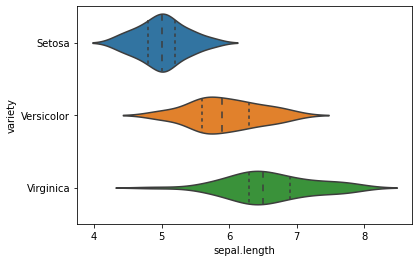

In [21]:
sns.violinplot(x='sepal.length',y='variety',data=iris,inner='quartile')

# Classification Model

In [22]:
X = iris.iloc[:, :4]
y = iris.iloc[:, 4]
print(X.head())
print(y.head())

   sepal.length  sepal.width  petal.length  petal.width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    Setosa
1    Setosa
2    Setosa
3    Setosa
4    Setosa
Name: variety, dtype: object


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size=0.4)

In [24]:
print('Training set : ')
print(X_train.shape)
print(y_train.shape)

print('\nTest set : ')
print(X_test.shape)
print(y_test.shape)

Training set : 
(89, 4)
(89,)

Test set : 
(60, 4)
(60,)


In [25]:
k_range = list(range(1,26))
score   = []
for k in k_range :
    model_knn = KNeighborsClassifier(n_neighbors=k) # konfigurasi algoritma
    model_knn.fit(X_train, y_train)
    y_pred    = model_knn.predict(X_test)
    score.append(accuracy_score(y_test, y_pred))

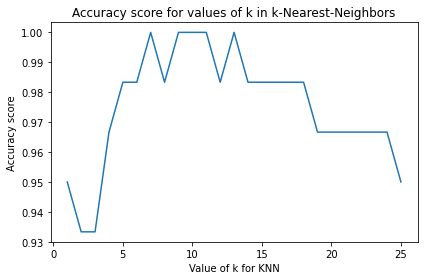

In [26]:
plt.plot(k_range, score)
plt.title('Accuracy score for values of k in k-Nearest-Neighbors')
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy score')
plt.tight_layout()
plt.show()

# for example

In [31]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y_train)
y_pred    = model_knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9333333333333333


# Suppor Vector Classifier

In [34]:
model_svc = SVC(gamma='scale')
model_svc.fit(X_train, y_train)
y_pred   = model_svc.predict(X_test)

1.0


# Decision Tree Classifier

In [35]:
model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_train,y_train)
y_pred    = model_dtc.predict(X_test)

# Random Forest Classifier

In [37]:
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, y_train)
y_pred    = model_rfc.predict(X_test)

# Accuracy comparasion for various models

In [38]:
models = [model_knn, model_dtc, model_svc, model_rfc]
scores = []
for model in models:
    pred = model.predict(X_test)
    scores.append(accuracy_score(y_test,pred))
    
print(scores)

[0.9333333333333333, 0.9833333333333333, 1.0, 0.9666666666666667]


In [39]:
# Visualisasi

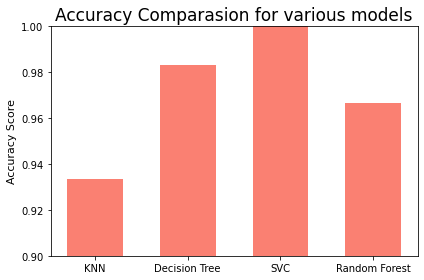

In [49]:
plt.bar(['KNN','Decision Tree','SVC','Random Forest'], scores, width=0.6, color='salmon')
plt.ylim(0.9,1)
plt.title('Accuracy Comparasion for various models', fontsize=17)
plt.ylabel('Accuracy Score',fontsize=11)
plt.tight_layout()
plt.show()